### 推导下列正态分布均值的极大似然估计：
数据$x_1,x_2...x_3$来自正态分布$N(\mu,\delta^2)$,其中$\delta$已知
1. 根据样本$x_1,x_2...x_3$写出$\mu$的极大似然估计  
$p(x=x_1) = \frac{1}{\sqrt{2\pi\delta}}e^{-\frac{(x_1-\mu)^2}{2\delta^2}}$  
$p(x=x_1)p(x=x_2)...p(x=x_n) = (\frac{1}{\sqrt{2\pi\delta}})^n e^{\Sigma_{x=1}^n {-\frac{(x_n-\mu)^2}{2\delta^2}}}$  
对其取对数可得：
$ log(p(x=x_1)p(x=x_2)...p(x=x_n)) = nlog(\frac{1}{\sqrt{2\pi\delta}})+\Sigma_{x=1}^n {-\frac{(x_n-\mu)^2}{2\delta^2}}$  
对\mu求导且令导数为零可知$\mu =\frac{\Sigma_{x=1}^nx_n}{n}$ $p(x1,x2 ...x3)$的概率最大。
2. 假设$\mu$的先验分布为$N(0,\tau)$ 根据样本$x_1,x_2...x_3$写出$\mu$的贝叶斯估计估计  
$\pi(\mu) = \frac{1}{\sqrt{2\pi\delta}}e^{-\frac{u^2}{2\tau^2}}$  
$p(\mu|x_1,x_2...x_n)= \frac{1}{\sqrt{2\pi\delta}}e^{-\frac{u^2}{2\tau^2}} (\frac{1}{\sqrt{2\pi\delta}})^n e^{\Sigma_{x=1}^n {-\frac{(x_n-\mu)^2}{2\delta^2}}} $  
取对数同时令导数为0可得
$\mu = \frac{\tau^2 \Sigma_{x=1}^n{x_n}}{\delta^2+n\tau^2}$ 时联合概率密度最大

1.感知机的假设空间是什么，模型复杂度体现在哪里  
答：感知机的假设空间是线性分类模型，复杂度体现在输入特征向量的维度上。

In [2]:
import numpy as np

In [3]:
def generate_data():
    # X,Y =sklearn.datasets.make_classification(n_samples=100,n_features= 2,n_classes=2,n_redundant=0)
    X = np.array([[3,3],[4,3],[1,1]])
    Y = np.array([1,1,-1])
    return X,Y

In [4]:
def generate_fake_data(n,params):
    '''
    返回一个自己生成的给定分界线的二分类数据集
    '''
    X = np.random.randn(100,2)
    Y = np.sign(np.dot(X,params["w"])+params["b"]).flatten()
    return X,Y

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [132]:
# 函数及数据集生成
params={}
params["w"] = np.array([[1],[1]])
params["b"] = 1
X,Y = generate_fake_data(100,params)

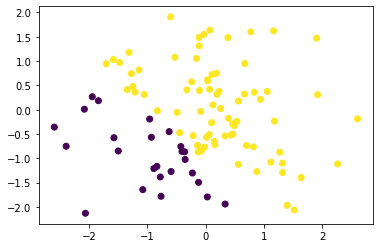

In [133]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [6]:
def cost_function(X,Y,params):
    '''
    计算损失函数为误分类点到分类超平面的距离
    '''
    predict_Y = my_predict(X,params)
    False_X = X[predict_Y != Y]
    False_Y = Y[predict_Y != Y]
    return -np.sum((np.dot(False_X,params["w"])+params["b"]).flatten()*False_Y)
# params["w"] = np.array([[1],[1]])
# params["b"] = 1
# cost_function(X,Y,params)

In [7]:
def my_predict(X,params):
    return np.sign(np.dot(X,params["w"])+params["b"]).flatten()

In [8]:
def train_one_time(x,y,params,delta):
    params["w"] = params["w"] + delta * x.reshape(2,1) * y
    params["b"] = params["b"] + delta * y
    return params


In [9]:
def choice_false_one(X,Y,params):
    predict_Y = np.sign(np.dot(X,params["w"])+params["b"]).flatten()
    if (predict_Y == Y).all() == True:
        return None,None
    False_X = X[predict_Y != Y]
    False_Y = Y[predict_Y != Y]
    r = np.random.randint(0,False_X.shape[0])
    return False_X[r],False_Y[r]

# params["w"] = np.array([[0],[0]])
# params["b"] = 0
# x,y = choice_false_one(X,Y,params)
# print(x,y)
# print(x.shape)
# params["w"] = np.array([[1],[1]])
# params["b"] = 1
# x,y = choice_false_one(X,Y,params)
# print(x,y)

In [203]:
a = np.array([False,True,True])
a.all()== True

False

In [154]:
a=np.array([1,2,3])
b=np.array([1,2,3])
a == b

array([ True,  True,  True])

In [103]:
X.shape

(100, 2)

In [10]:
def main():
    '''
    主函数
    '''
    target_params={}
    target_params["w"] = np.array([[1],[1]])
    target_params["b"] = 1
    X,Y = generate_fake_data(100,target_params)
#     X = np.array([[3,3],[4,3],[1,1]])
#     Y = np.array([1,1,-1])
    params={}
    params["w"] = np.array([[0],[0]]) # 权值初始化
    params["b"] = 0
    costs =[]
    for i in range(2000):
        x,y = choice_false_one(X,Y,params)
        if x is None:
            break
        else:
            params = train_one_time(x,y,params,0.01)
#            print(params)
#             print(X.shape)
#             print(params["w"].shape)
#             print(np.dot(X,params["w"]).shape)
#             print(-np.sum((np.dot(X,params["w"])+params["b"]).flatten()*Y))
            costs.append(cost_function(X,Y,params))
    print (params)
    predict = my_predict(X,params)
#     plt.scatter(X[:,0],X[:,1],c=predict)
    
#     plt.subplot(211)
#     plt.scatter(X[:,0],X[:,1],c=Y)
#     plt.subplot(212)

    grid = plt.GridSpec(2, 2, wspace=0.5, hspace=0.5)

    plt.subplot(grid[0,0])
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.title("real data")
    plt.subplot(grid[1,0])
    plt.scatter(X[:,0],X[:,1],c=predict)
    plt.title("predict data")

    plt.subplot(grid[:,1])
    plt.plot(np.arange(len(costs)),costs)

{'w': array([[0.03158316],
       [0.03028727]]), 'b': 0.03}


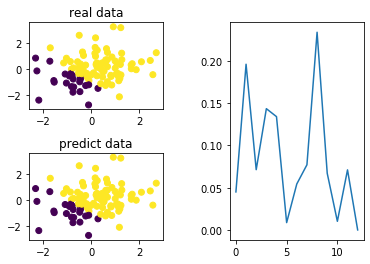

In [11]:
main()

1.0

In [221]:
plt.scatter(X[:,0],X[:,1],c=predict)

NameError: name 'predict_Y' is not defined

In [140]:
def generate_data():
    # X,Y =sklearn.datasets.make_classification(n_samples=100,n_features= 2,n_classes=2,n_redundant=0)
    X = np.array([[3,3],[4,3],[1,1]])
    Y = np.array([1,1,-1])
    return X,Y
def generate_fake_data(n,params):
    '''
    返回一个自己生成的给定分界线的二分类数据集
    '''
    X = np.random.randn(100,2)
    Y = np.sign(np.dot(X,params["w"])+params["b"]).flatten()
    return X,Y
def cost_function(X,Y,params):
    '''
    计算损失函数为误分类点到分类超平面的距离
    '''
    predict_Y = my_predict(X,params)
    False_X = X[predict_Y != Y]
    False_Y = Y[predict_Y != Y]
    return -np.sum((np.dot(False_X,params["w"])+params["b"]).flatten()*False_Y)

def my_predict(X,params):
    return np.sign(np.dot(X,params["w"])+params["b"]).flatten()



def Stochastic_gradient(X,Y):
    def train_one_time(x,y,params,delta):
        params["w"] = params["w"] + delta * x.reshape(2,1) * y
        params["b"] = params["b"] + delta * y
        return params
    
    def choice_false_one(X,Y,params):
        predict_Y = np.sign(np.dot(X,params["w"])+params["b"]).flatten()
        if (predict_Y == Y).all() == True:
            return None,None
        False_X = X[predict_Y != Y]
        False_Y = Y[predict_Y != Y]
        r = np.random.randint(0,False_X.shape[0])
        return False_X[r],False_Y[r]


    params={}
    params["w"] = np.array([[0],[0]]) # 权值初始化
    params["b"] = 0
    costs =[]
    for i in range(2000):
        x,y = choice_false_one(X,Y,params)
        if x is None:
            break
        else:
            params = train_one_time(x,y,params,0.01)
            costs.append(cost_function(X,Y,params))
    print (params)
    predict = my_predict(X,params)
    grid = plt.GridSpec(2, 2, wspace=0.5, hspace=0.5)
    plt.subplot(grid[0,0])
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.title("real data")
    plt.subplot(grid[1,0])
    plt.scatter(X[:,0],X[:,1],c=predict)
    plt.title("predict data")
    plt.subplot(grid[:,1])
    plt.plot(np.arange(len(costs)),costs)
def dual_of_perceptron(X, Y): # 感知机对偶形式 不知道英文对不对
    
    def gram(X):
        return np.dot(X , X.T)
    def alpha_to_params(X,Y,a,b):
        params={}
        params["w"] = np.sum(a*Y.reshape(Y.shape[0],1)*X,axis=0)
        params["b"] = b
        return params
        
    def train_one_time(r, a, b, Y, delta):
        a[r] += delta
        b += delta * Y[r]
        return a, b
    
    a = np.zeros((X.shape[0],1)) # 初始化a 和 b
    b = 0
    G = gram(X)
#     print("x:",X)
    train_complete = False
    j = 0
    while train_complete == False:
        for i in range(X.shape[0]):            
            judgetemp = Y[i] * (np.sum(a * Y.reshape(Y.shape[0], 1) * G[:,i].reshape(Y.shape[0], 1)) + b)
            if judgetemp <= 0:
                a, b= train_one_time(i, a, b, Y, 1)
                break
        else:
            train_complete = True
            
    

    params = alpha_to_params(X, Y, a, b)    
    predict = my_predict(X,params)
    #grid = plt.GridSpec(2, 2, wspace=0.5, hspace=0.5)
    plt.subplot(121)
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.title("real data")
    plt.subplot(122)
    plt.scatter(X[:,0],X[:,1],c=predict)
    plt.title("predict data")
def main():
    '''
    主函数
    '''
#     target_params={}
#     target_params["w"] = np.array([[1],[1]])
#     target_params["b"] = 1
#     X,Y = generate_fake_data(100,target_params)
    X,Y = generate_data()
    %timeit Stochastic_gradient(X, Y)
    %timeit dual_of_perceptron(X, Y)
    


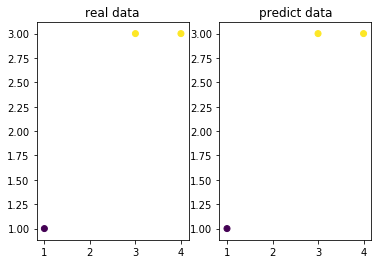

In [139]:
    X,Y = generate_data()
    dual_of_perceptron(X, Y)

In [109]:
def gram(X):
    return np.dot(X , X.T)
def alpha_to_params(X,Y,a):
    params={}
    params["w"] = np.sum(a*Y.reshape(Y.shape[0],1)*X,axis=0)
    params["b"] = np.sum(a*Y)
    return params
X,Y = generate_data()
a=np.array([[1], [2], [3]])
alpha_to_params(X, Y ,a)
gram(X)

array([[18, 21,  6],
       [21, 25,  7],
       [ 6,  7,  2]])

In [39]:
print(a.shape)
print(Y.shape)
print(X.shape)
print(Y)
print(X)
print(np.sum(a*Y.reshape(Y.shape[0],1)*X,axis=0))

(3, 1)
(3,)
(3, 2)
[ 1  1 -1]
[[3 3]
 [4 3]
 [1 1]]
[8 6]


In [142]:
X,Y = generate_data()

{'w': array([[0.01],
       [0.01]]), 'b': -0.03}
{'w': array([[ 1.00000000e-02],
       [-3.46944695e-18]]), 'b': -0.02}
{'w': array([[ 1.00000000e-02],
       [-3.46944695e-18]]), 'b': -0.02}
{'w': array([[ 1.00000000e-02],
       [-3.46944695e-18]]), 'b': -0.02}
{'w': array([[ 1.00000000e-02],
       [-3.46944695e-18]]), 'b': -0.02}
{'w': array([[ 1.00000000e-02],
       [-3.46944695e-18]]), 'b': -0.02}
{'w': array([[0.01],
       [0.01]]), 'b': -0.03}
{'w': array([[0.02],
       [0.01]]), 'b': -0.03}
{'w': array([[0.01],
       [0.01]]), 'b': -0.03}
{'w': array([[ 1.00000000e-02],
       [-3.46944695e-18]]), 'b': -0.02}
{'w': array([[0.01],
       [0.01]]), 'b': -0.03}
{'w': array([[ 1.00000000e-02],
       [-3.46944695e-18]]), 'b': -0.02}
{'w': array([[ 1.00000000e-02],
       [-3.46944695e-18]]), 'b': -0.02}
{'w': array([[ 1.00000000e-02],
       [-3.46944695e-18]]), 'b': -0.02}
{'w': array([[ 1.00000000e-02],
       [-3.46944695e-18]]), 'b': -0.02}
{'w': array([[0.02],
       [0

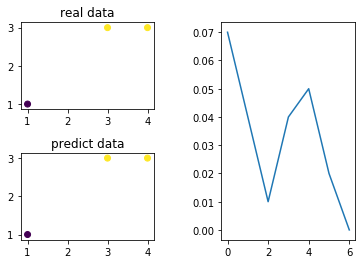

In [143]:
%timeit Stochastic_gradient(X, Y)

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:100: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:103: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


5.43 ms ± 252 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


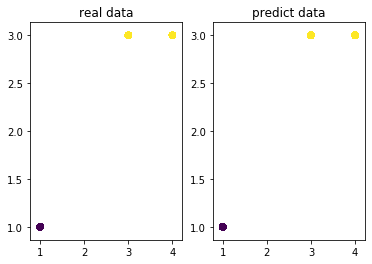

In [144]:
%timeit dual_of_perceptron(X, Y) # 确实比较快

In [149]:
from sklearn.linear_model import Perceptron
#定义感知机
clf = Perceptron()
#使用训练数据进行训练 好快好快
%timeit clf.fit(X , Y)
print(clf.coef_)

527 µs ± 12.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
[[1. 0.]]


In [146]:
?Perceptron

Init signature:
Perceptron(
    penalty=None,
    alpha=0.0001,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    eta0=1.0,
    n_jobs=None,
    random_state=0,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    class_weight=None,
    warm_start=False,
)
Docstring:     
Perceptron

Read more in the :ref:`User Guide <perceptron>`.

Parameters
----------

penalty : None, 'l2' or 'l1' or 'elasticnet'
    The penalty (aka regularization term) to be used. Defaults to None.

alpha : float
    Constant that multiplies the regularization term if regularization is
    used. Defaults to 0.0001

fit_intercept : bool
    Whether the intercept should be estimated or not. If False, the
    data is assumed to be already centered. Defaults to True.

max_iter : int, optional (default=1000)
    The maximum number of passes over the training data (aka epochs).
    It only impacts the behavior in the ``fit`` method, and not the
 